In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import json

In [6]:
df = pd.read_csv("../data/EURUSD_with_signals.csv", parse_dates=["datetime"])
with open("../data/selected_combos.json", "r") as f:
    combos = json.load(f)


🔍 Clustering analysis for C10: ['bb_bandwidth', 'rsi', 'stoch_k']


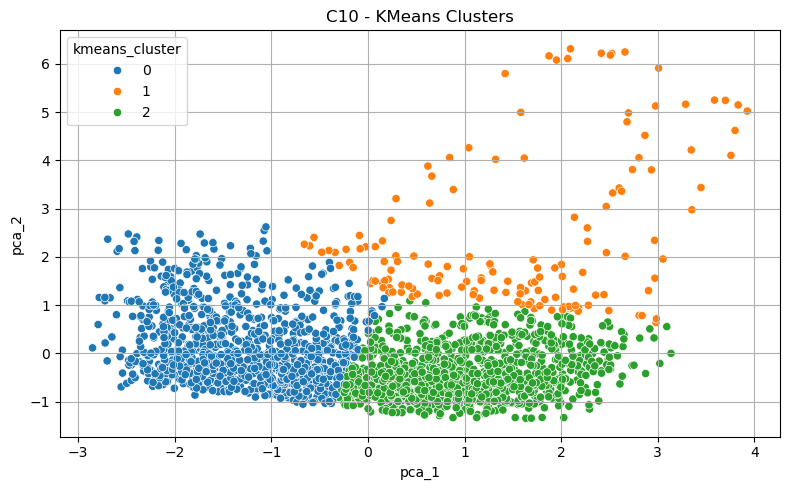

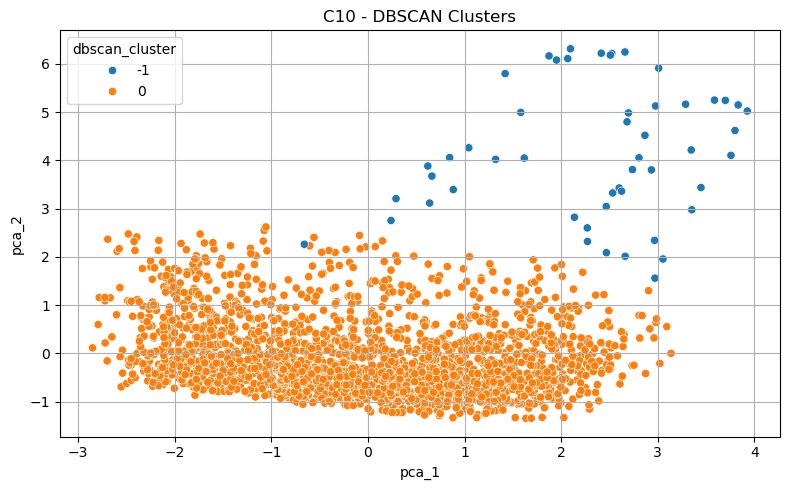

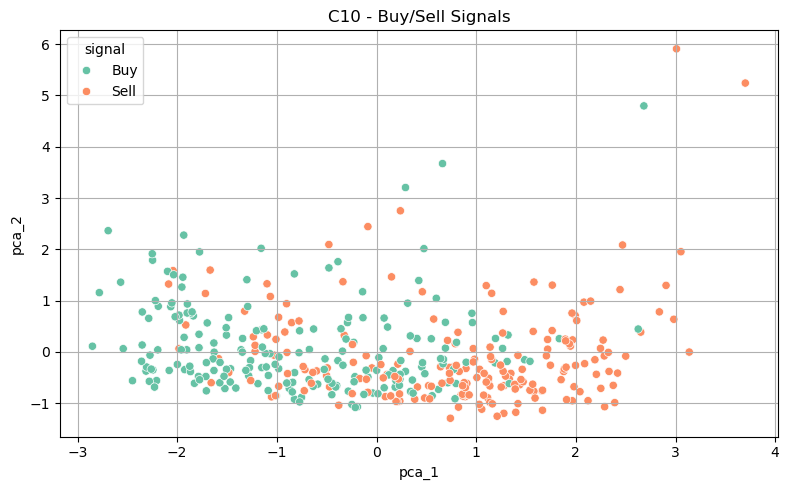


🔍 Clustering analysis for C11: ['macd_diff', 'rsi', 'atr']


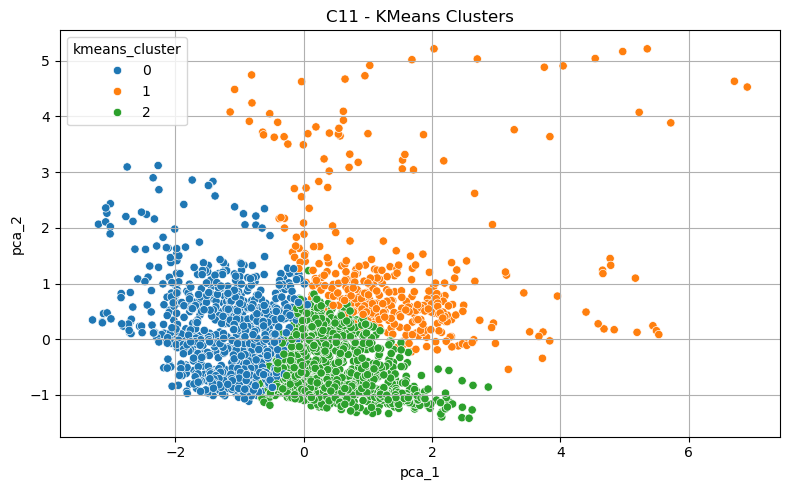

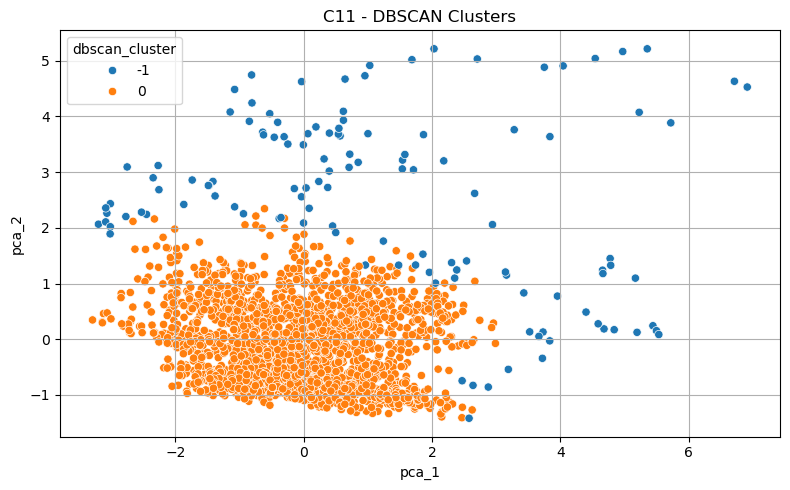

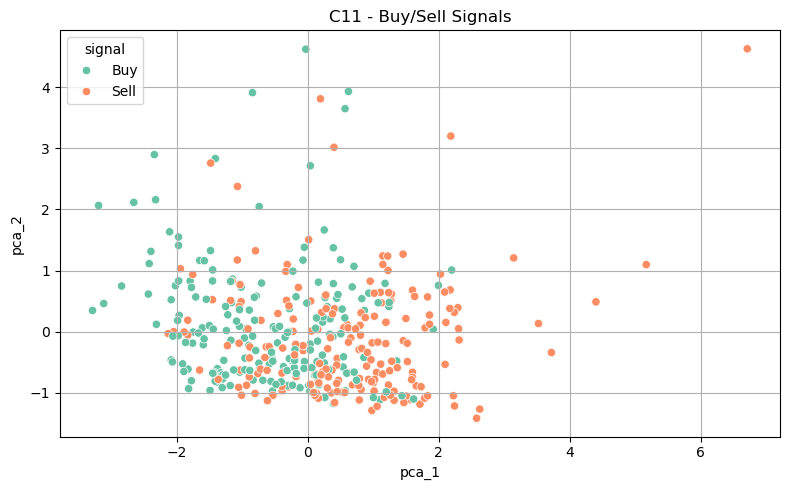


🔍 Clustering analysis for C12: ['stoch_k', 'rsi', '<TICKVOL>']


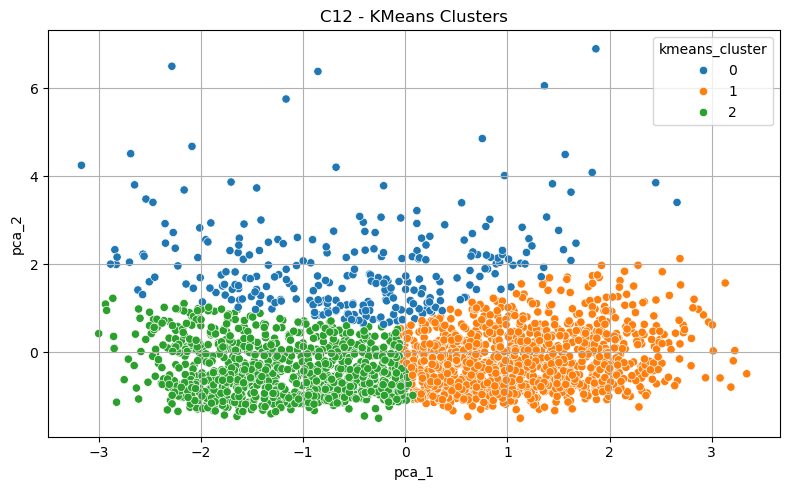

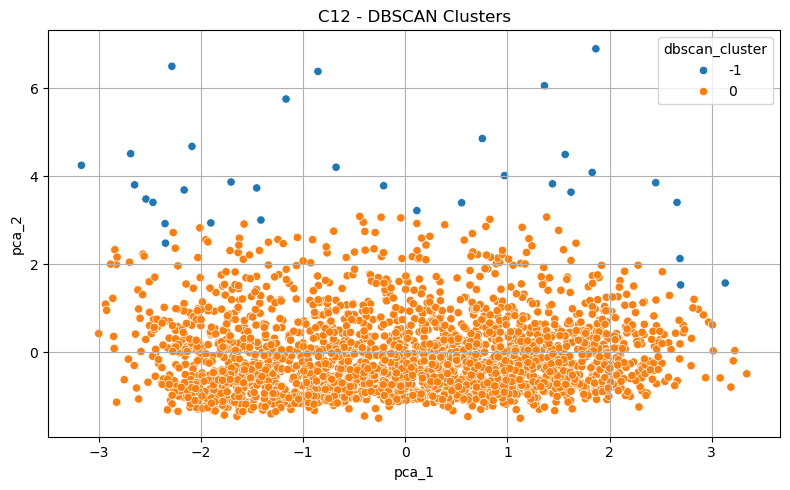

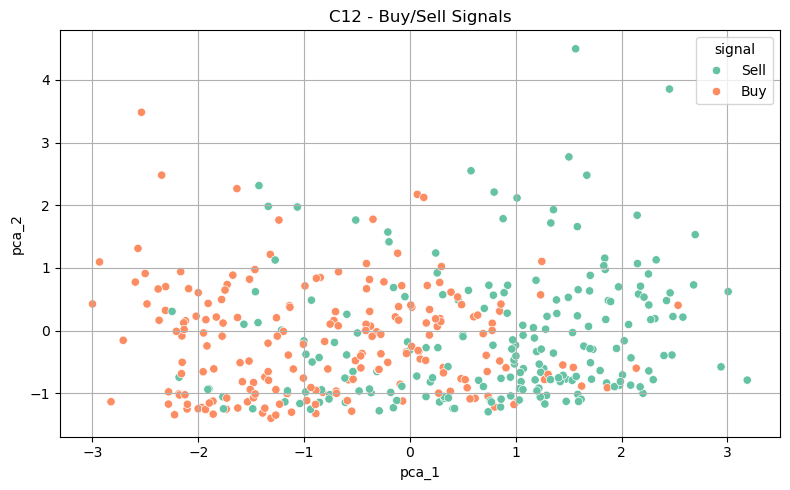


🔍 Clustering analysis for C13: ['macd_diff', 'ema_50', 'bb_bandwidth']


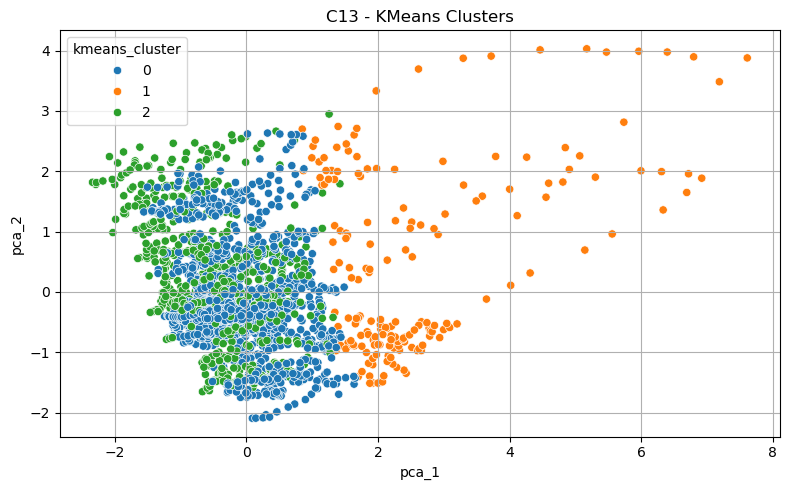

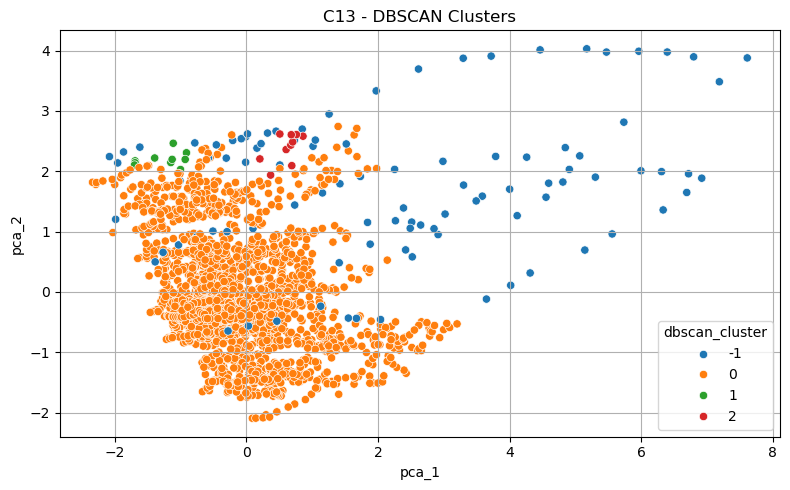

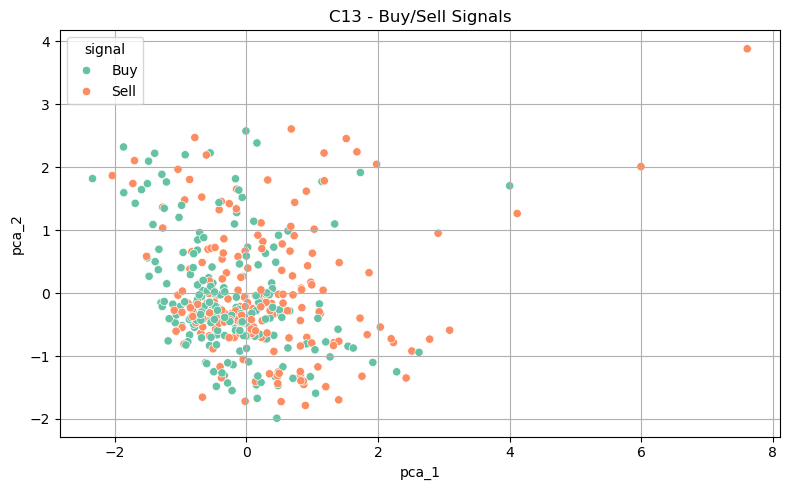


🔍 Clustering analysis for C14: ['bb_upper', 'rsi']


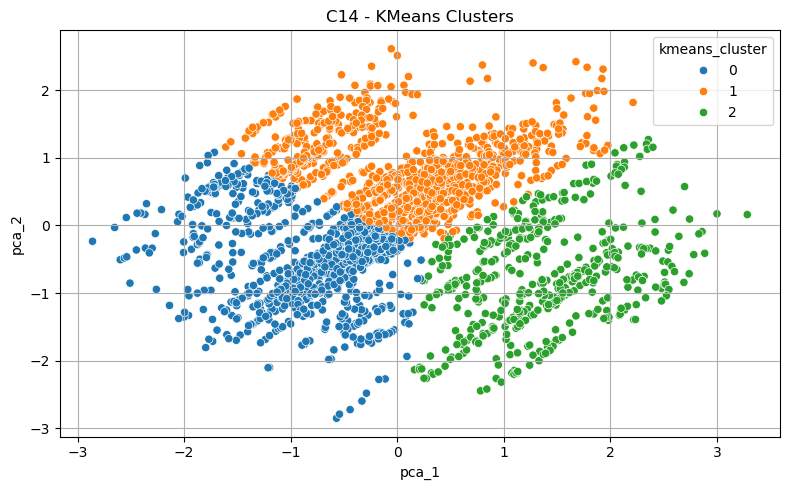

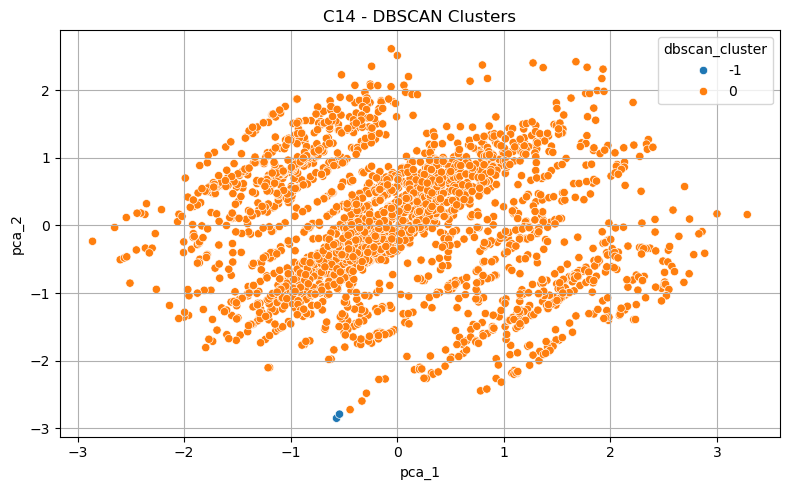

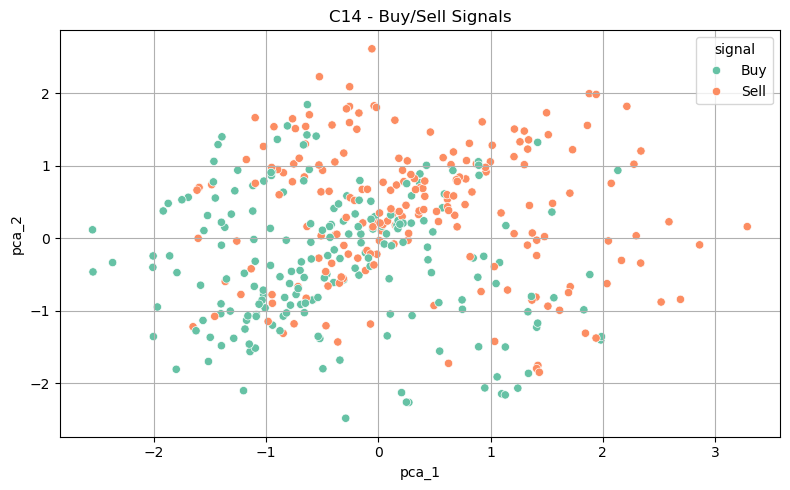


🔍 Clustering analysis for C15: ['bb_lower', 'rsi']


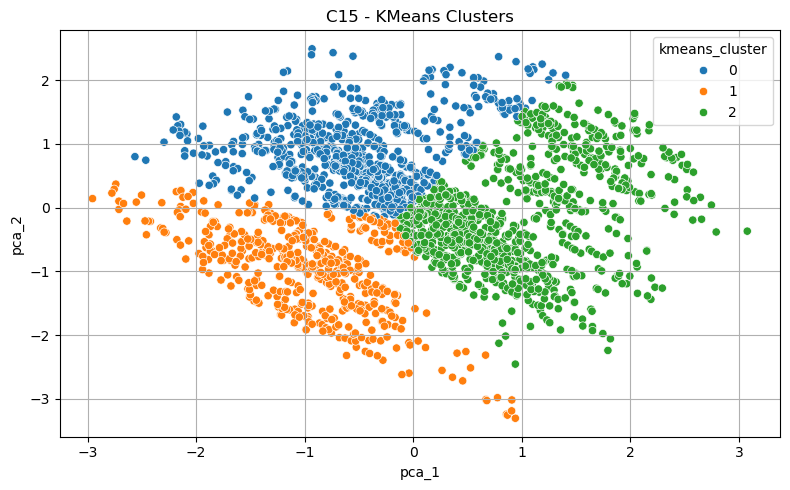

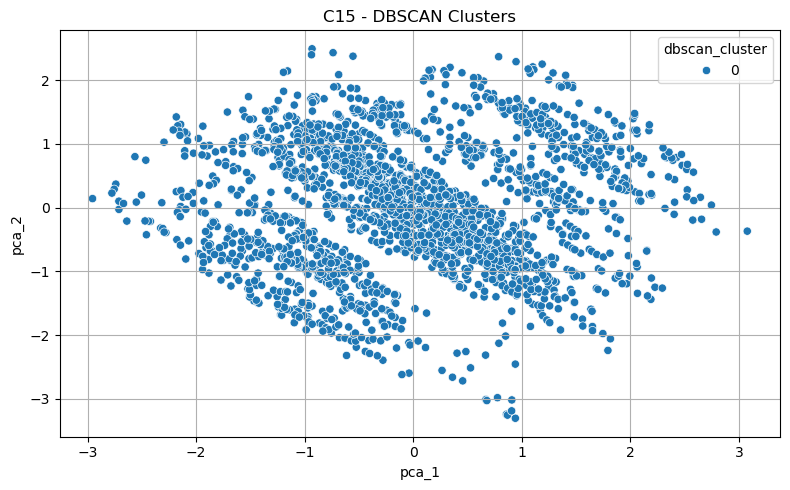

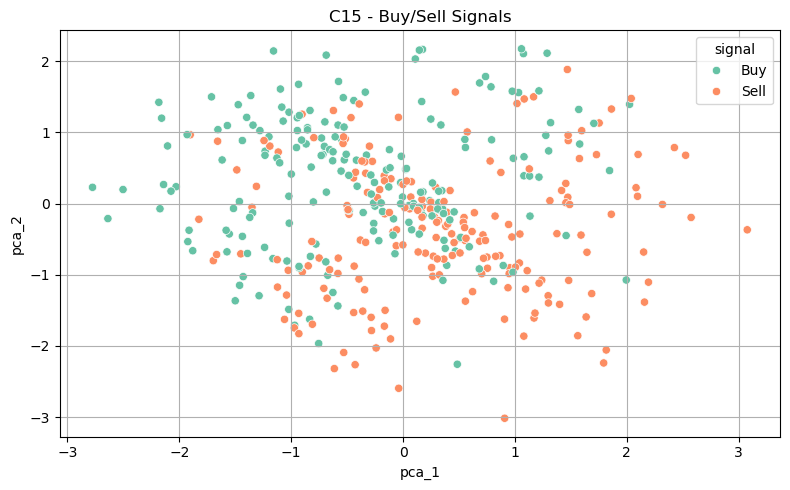


🔍 Clustering analysis for C16: ['macd', 'macd_signal']


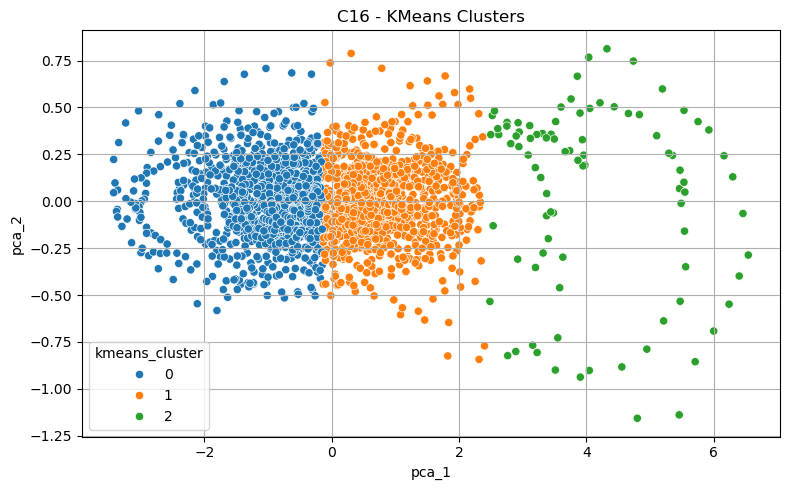

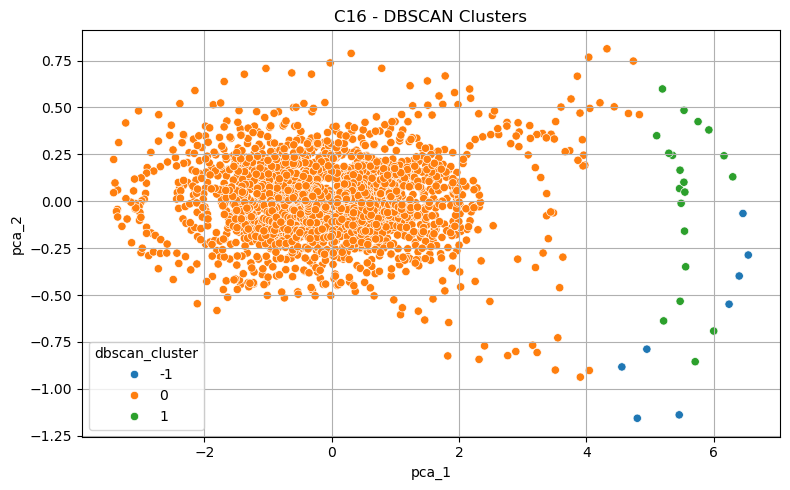

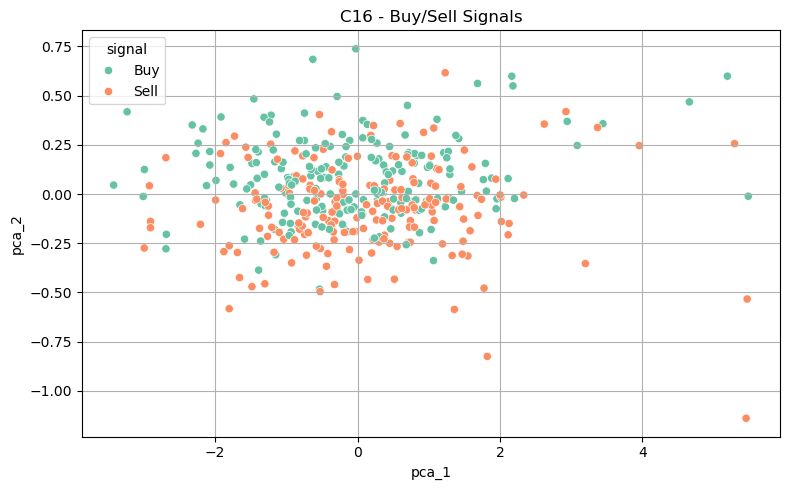

In [7]:
for combo_id, features in combos.items():
    print(f"\n🔍 Clustering analysis for {combo_id}: {features}")

    # Drop NaNs and scale
    combo_df = df[features + ["signal"]].dropna().copy()
    scaler = StandardScaler()
    combo_scaled = scaler.fit_transform(combo_df[features])

    # Align df
    df_combo = combo_df.reset_index(drop=True).copy()

    # --- KMeans ---
    kmeans = KMeans(n_clusters=3, random_state=42)
    df_combo["kmeans_cluster"] = kmeans.fit_predict(combo_scaled)

    # --- DBSCAN ---
    dbscan = DBSCAN(eps=0.6, min_samples=10)
    df_combo["dbscan_cluster"] = dbscan.fit_predict(combo_scaled)

    # --- PCA ---
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(combo_scaled)
    df_combo["pca_1"] = pca_result[:, 0]
    df_combo["pca_2"] = pca_result[:, 1]

    # --- KMeans Plot ---
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_combo, x="pca_1", y="pca_2", hue="kmeans_cluster", palette="tab10")
    plt.title(f"{combo_id} - KMeans Clusters")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- DBSCAN Plot ---
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_combo, x="pca_1", y="pca_2", hue="dbscan_cluster", palette="tab10")
    plt.title(f"{combo_id} - DBSCAN Clusters")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Actual Signals ---
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_combo[df_combo.signal.isin(["Buy", "Sell"])], x="pca_1", y="pca_2", hue="signal", palette="Set2")
    plt.title(f"{combo_id} - Buy/Sell Signals")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
